# Experience 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as collections

## Definitions

In [2]:
max_idx = lambda d, i: np.where(d[i] == np.max(d[i]))[0][0]

colours = {"10": "tab:blue",
           "15": "tab:orange",
           "20": "tab:green",
           "25": "tab:red",
           "30": "tab:purple",
           "up": "tab:cyan",
           "down": "tab:gray"
}

## Importing Data

In [3]:
names = ["%d" % (5*(i+2)) for i in range(5)]

data = dict()
time = dict()
pos = dict()

for i in names:
    data[i] = pd.read_csv(i+".csv", sep=",", skiprows=[0])
    print(data[i].shape)
    time[i] = data[i]["t"]
    pos[i] = data[i]["x"]/np.cos(np.radians(int(i)))

(748, 3)
(59, 3)
(50, 3)
(44, 3)
(39, 3)


### Separating Data Up from Down

In [4]:
for name in names:
    l = len(pos[name])
    m = max_idx(pos, name) + 1
    pos[name+"_up"] = (pos[name][0:m]).reset_index(drop=True)
    pos[name+"_down"] = (pos[name][m:l]).reset_index(drop=True)
    time[name+"_up"] = (time[name][0:m]).reset_index(drop=True)
    time[name+"_down"] = (time[name][m:l]).reset_index(drop=True)

### Cleaning the Dataset

In [5]:
step = 4

spd = dict()

for name in names:
    n = name+"_up"
    l = len(pos[n])
    check = [-1000, 0]
    i = 1
    #we now that the slope of the speed is positive
    #so we only need to know when the slope is negative
    while(check[i] > check[i-1]):
        v = (pos[n][i+step] - pos[n][i]) / (time[n][i+step] - time[n][i])
        check.append(v)
        i+=1
    #with this we keep all the data after the max value of the speed
    #is better to not keep the max value
    i_max=i-1
    pos[name+"_cln_up"] = (pos[n][i_max:l]).reset_index(drop=True)
    time[name+"_cln_up"] = (time[n][i_max:l]).reset_index(drop=True)
    n = name
    l = len(pos[n])
    pos[n+"_cln"] = (pos[n][i_max:l]).reset_index(drop=True)
    time[n+"_cln"] = (time[n][i_max:l]).reset_index(drop=True)

## Calculating the Missing Quantities

### Calculating the Speed

In [6]:
step = 4

spd = dict()

for name in names:
    for orientation in ["_cln_up", "_down"]:
        n = name+orientation
        n_time = name+"_spd"+orientation
        spd[n] = list()
        time[n_time] = list()
        l = len(pos[n])
        for i in range(l-step):
            v = (pos[n][i+step] - pos[n][i]) / (time[n][i+step] - time[n][i]) 
            t = time[n][i] + (time[n][i+step] - time[n][i])/2
            spd[n].append(v)
            time[n_time].append(t)

### Calculating the Acceleration

In [7]:
step = 4

acc = dict()

for name in names:
    for orientation in ["_cln_up", "_down"]:
        n = name+orientation
        n_time = name+"_acc"+orientation
        acc[n] = list()
        time[n_time] = list()
        l = len(spd[n])
        for i in range(l-step):
            v = (spd[n][i+step] - spd[n][i]) / (time[n][i+step] - time[n][i]) 
            t = time[n][i] + (time[n][i+step] - time[n][i])/2
            acc[n].append(v)
            time[n_time].append(t)

## Fitting the Data and Derivating the Polynomials

In [8]:
degree = 2
linspace_length = 2000#300

coefs = dict()
pols = dict()
fit_x = dict()

for name in names:
    for orientation in ["_cln_up", "_down"]:
        n = name+orientation
        coefs[n] = np.polyfit(time[n], pos[n], degree)
        pols[n] = np.poly1d(coefs[n])
        pols[n+"_p"] = pols[n].deriv()
        pols[n+"_pp"] = pols[n+"_p"].deriv()
        fit_x[n] = np.linspace(time[n][0], time[n][len(time[n])-1], linspace_length)
        #fit_x[n] = np.linspace(0, 25, linspace_length)
        n_s = name+"_spd"+orientation
        fit_x[n+"_p"] = np.linspace(time[n_s][0], time[n_s][len(time[n_s])-1], linspace_length)
        #fit_x[n+"_p"] = np.linspace(0, 25, linspace_length)
        n_a = name+"_acc"+orientation
        fit_x[n+"_pp"] = np.linspace(time[n_a][0], time[n_a][len(time[n_a])-1], linspace_length)
        #fit_x[n+"_pp"] = np.linspace(0, 25, linspace_length)

In [9]:
print("The Equations obtained for the position when ascending:")
for name in ["%d_cln_up" % i for i in range(10, 31, 5)]:
    print(pols[name])

The Equations obtained for the position when ascending:
        2
-180.7 x + 254.7 x - 25.43
        2
-229.6 x + 376 x - 83.07
        2
-242.9 x + 335.4 x - 46.46
        2
-285.8 x + 385.9 x - 57.22
        2
-315.4 x + 352.7 x - 24.06


In [10]:
print("The Equations obtained for the position when descending:")
for name in ["%d_down" % i for i in range(10, 31, 5)]:
    print(pols[name])

The Equations obtained for the position when descending:
         2
0.06952 x - 4.084 x + 62.59
        2
-39.11 x + 57.11 x + 51.03
     2
-63 x + 78.14 x + 45.81
        2
-107.4 x + 140.8 x + 26.83
      2
-145 x + 160.2 x + 30.23


In [11]:
print("The Equations obtained for the position, derivated two times, when ascending:")
for name in ["%d_cln_up_pp" % i for i in range(10, 31, 5)]:
    print(pols[name])

The Equations obtained for the position, derivated two times, when ascending:
 
-361.5
 
-459.2
 
-485.7
 
-571.7
 
-630.7


In [12]:
for name in ["%d_down_pp" % i for i in range(10, 31, 5)]:
    print(pols[name])

 
0.139
 
-78.23
 
-126
 
-214.8
 
-289.9


## Plots

### Plotting the Position

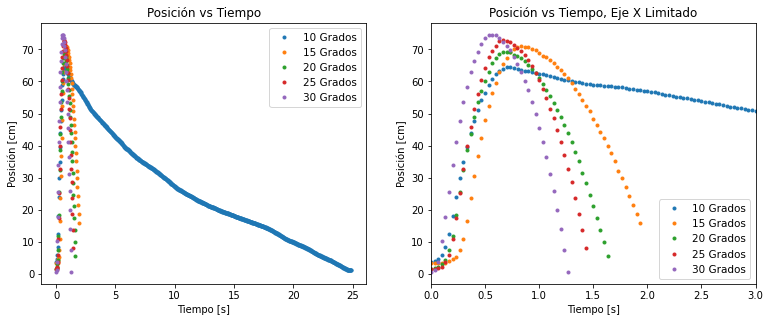

In [13]:
s = 0.8
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16*s,6*s))
for i in names:
    axs[0].plot(time[i], pos[i], ".", c=colours[i])
    axs[1].plot(time[i], pos[i], ".", c=colours[i])
    
for j in [0, 1]:
    axs[j].set_xlabel("Tiempo [s]") # Time
    axs[j].set_ylabel("Posición [cm]") # Position
    axs[j].legend(["%s Grados" % i for i in names], fontsize=13*s) #degrees
axs[0].set_title("Posición vs Tiempo") # Position vs Time
axs[1].set_title("Posición vs Tiempo, Eje X Limitado") # Position vs Time, X-Axis Limited
axs[1].set_xlim(0,3)
plt.show()

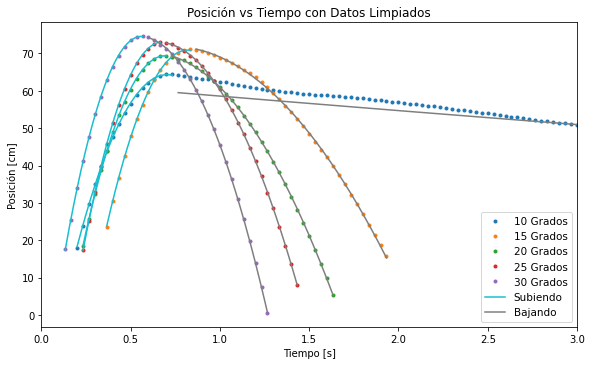

In [14]:
s = 0.8
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12*s,7*s))
for i in names:
    n = i+"_cln"
    axs.plot(time[n], pos[n], ".", c=colours[i])
    
for name in names:
    for orientation in ["_cln_up", "_down"]:
        n = name+orientation
        axs.plot(fit_x[n], pols[n](fit_x[n]), "-", 
                 c=colours[orientation.split("_")[-1]])
    
axs.set_xlabel("Tiempo [s]") # Time
axs.set_ylabel("Posición [cm]") # Position
axs.legend(["%s Grados" % i for i in names] + ["Subiendo", "Bajando"], fontsize=13*s) #degrees
axs.set_title("Posición vs Tiempo con Datos Limpiados") # Position vs Time with Cleaned Data
axs.set_xlim(0,3)
plt.show()

### Plotting the Speed

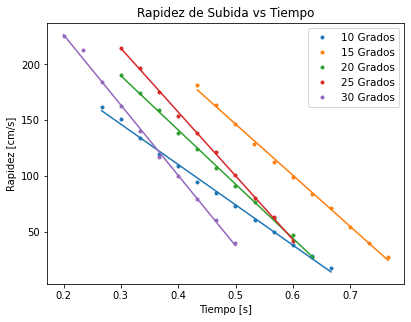

In [15]:
s = 0.8
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8*s,6*s))
for i in names:
    n = i+"_cln_up"
    n_t = i+"_spd_cln_up"
    axs.plot(time[n_t], spd[n], ".", c=colours[i])
    
for name in names:
    orientation = "_cln_up"
    n = name+orientation
    axs.plot(fit_x[n+"_p"], pols[n+"_p"](fit_x[n+"_p"]), "-", c=colours[name])
    
axs.set_xlabel("Tiempo [s]") # Time
axs.set_ylabel("Rapidez [cm/s]") # Speed
axs.legend(["%s Grados" % i for i in names], fontsize=13*s) #degrees
axs.set_title("Rapidez de Subida vs Tiempo") # Up Speed vs Time 
# axs.set_xlim(0.15, 0.8)
# axs.set_ylim(0, 250)
plt.show()

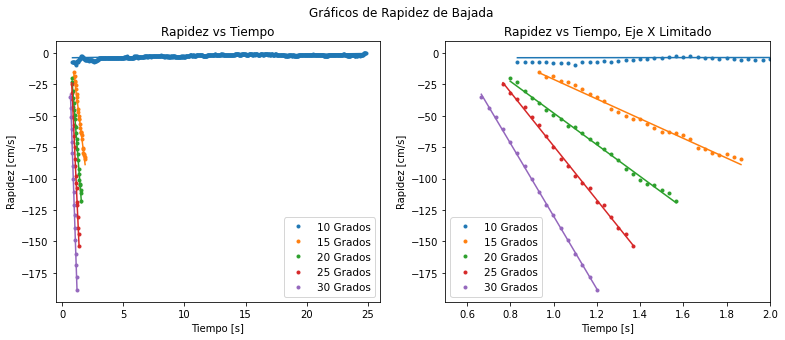

In [16]:
s = 0.8
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16*s,6*s))
for i in names:
    n = i+"_down"
    n_t = i+"_spd_down"
    axs[0].plot(time[n_t], spd[n], ".", c=colours[i])
    axs[1].plot(time[n_t], spd[n], ".", c=colours[i])
    
for name in names:
    orientation = "_down"
    n = name+orientation
    axs[0].plot(fit_x[n+"_p"], pols[n+"_p"](fit_x[n+"_p"]), "-", c=colours[name])
    axs[1].plot(fit_x[n+"_p"], pols[n+"_p"](fit_x[n+"_p"]), "-", c=colours[name])
    
for j in [0, 1]:
    axs[j].set_xlabel("Tiempo [s]") # Time
    axs[j].set_ylabel("Rapidez [cm/s]") # Speed
    axs[j].legend(["%s Grados" % i for i in names], fontsize=13*s) #degrees
axs[0].set_title("Rapidez vs Tiempo") # Speed vs Time
axs[1].set_title("Rapidez vs Tiempo, Eje X Limitado") # Speed vs Time, X-Axis Limited
axs[1].set_xlim(0.5,2)
fig.suptitle("Gráficos de Rapidez de Bajada") # Down Speed Plots
plt.show()

### Plotting the Acceleration

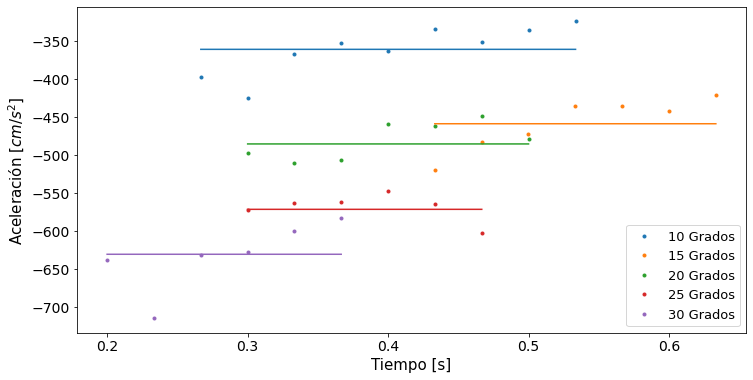

In [17]:
s = 1
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12*s,6*s))
for i in names:
    n = i+"_cln_up"
    n_t = i+"_acc_cln_up"
    axs.plot(time[n_t], acc[n], ".", c=colours[i])
    
for name in names:
    orientation = "_cln_up"
    n = name+orientation
    axs.plot(fit_x[n+"_pp"], pols[n+"_pp"](fit_x[n+"_pp"]), "-", c=colours[name])
    
axs.set_xlabel("Tiempo [s]", fontsize=15*s) # Time
axs.set_ylabel(f"Aceleración [$cm/s^2$]", fontsize=15*s) # Acceleration
axs.legend(["%s Grados" % i for i in names], fontsize=13*s, loc="lower right") #degrees
#axs.set_title("Aceleración vs Tiempo", fontsize=18*s) # Acceleration vs Time with Cleaned Data
# axs.set_xlim(0.18, 0.68)
# axs.set_ylim(-750, -300)
axs.tick_params(axis='both', labelsize=14*s)
plt.show()

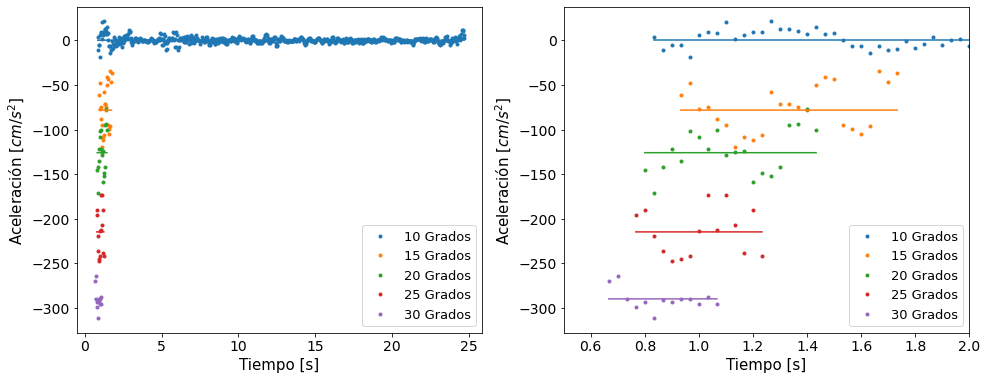

In [18]:
s = 1
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16*s,6*s))
for i in names:
    n = i+"_down"
    n_t = i+"_acc_down"
    axs[0].plot(time[n_t], acc[n], ".", c=colours[i])
    axs[1].plot(time[n_t], acc[n], ".", c=colours[i])
    
for name in names:
    orientation = "_down"
    n = name+orientation
    axs[0].plot(fit_x[n+"_pp"], pols[n+"_pp"](fit_x[n+"_pp"]), "-", c=colours[name])
    axs[1].plot(fit_x[n+"_pp"], pols[n+"_pp"](fit_x[n+"_pp"]), "-", c=colours[name])
    
for j in [0, 1]:
    axs[j].set_xlabel("Tiempo [s]", fontsize=15*s) # Time
    axs[j].set_ylabel(f"Aceleración [$cm/s^2$]", fontsize=15*s) # Speed
    axs[j].legend(["%s Grados" % i for i in names], fontsize=13*s) #degrees
    axs[j].tick_params(axis='both', labelsize=14*s)
# axs[0].set_title("Aceleración vs Tiempo") # Speed vs Time
# axs[1].set_title("Aceleración vs Tiempo, Eje X Limitado") # Speed vs Time, X-Axis Limited
axs[1].set_xlim(0.5,2)
# fig.suptitle("Gráficos de Aceleración de Bajada") # Down Speed Plots
plt.show()

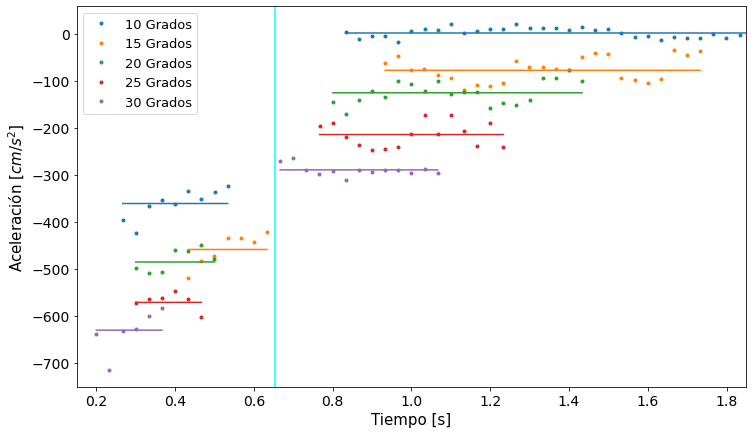

In [19]:
s = 1
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12*s,7*s))
for i in names:
    n = i+"_cln_up"
    n_t = i+"_acc_cln_up"
    axs.plot(time[n_t], acc[n], ".", c=colours[i])
    
for name in names:
    orientation = "_cln_up"
    n = name+orientation
    axs.plot(fit_x[n+"_pp"], pols[n+"_pp"](fit_x[n+"_pp"]), "-", c=colours[name])
    
for i in names:
    n = i+"_down"
    n_t = i+"_acc_down"
    axs.plot(time[n_t], acc[n], ".", c=colours[i])
    
for name in names:
    orientation = "_down"
    n = name+orientation
    axs.plot(fit_x[n+"_pp"], pols[n+"_pp"](fit_x[n+"_pp"]), "-", c=colours[name])
    
axs.set_xlabel("Tiempo [s]", fontsize=15*s) # Time
axs.set_ylabel(f"Aceleración [$cm/s^2$]", fontsize=15*s) # Acceleration
axs.legend(["%s Grados" % i for i in names], fontsize=13*s) #degrees
#axs.set_title("Aceleración vs Tiempo", fontsize=18*s) # Acceleration vs Time with Cleaned Data
axs.tick_params(axis='both', labelsize=14*s)
axs.set_xlim(0.15,1.85)

axs.axvline(time["15_acc_cln_up"][len(time["15_acc_cln_up"])-1]+0.02, c="cyan")

plt.show()

## Getting more insights about the Acceleration

In [20]:
acc_up_df = pd.DataFrame()
acc_up_df["Degree"] = list(map(int, names))
acc_up_df["Mean"] = [np.mean(acc["%s_cln_up" % i]) for i in names]
acc_up_df["Median"] = [np.median(acc["%s_cln_up" % i]) for i in names]
acc_up_df["Polynomial"] = [pols["%s_cln_up_pp" % i].c[0] for i in names]
acc_up_df["|Mean-Pol|"] = np.abs(acc_up_df["Mean"]-acc_up_df["Polynomial"])
acc_up_df["|Median-Pol|"] = np.abs(acc_up_df["Median"]-acc_up_df["Polynomial"])

In [21]:
print("Data of the Up Acceleration")
acc_up_df.style.format("{:.2f}")

Data of the Up Acceleration


,Degree,Mean,Median,Polynomial,|Mean-Pol|,|Median-Pol|
0,10.00,-361.54,-353.07,-361.46,0.09,8.38
1,15.00,-458.71,-442.77,-459.21,0.49,16.44
2,20.00,-480.79,-479.37,-485.74,4.95,6.37
3,25.00,-568.88,-564.19,-571.67,2.78,7.48
4,30.00,-632.66,-630.25,-630.71,1.95,0.45


In [22]:
acc_down_df = pd.DataFrame()
acc_down_df["Degree"] = list(map(int, names))
acc_down_df["Mean"] = [np.mean(acc["%s_down" % i]) for i in names]
acc_down_df["Median"] = [np.median(acc["%s_down" % i]) for i in names]
acc_down_df["Polynomial"] = [pols["%s_down_pp" % i].c[0] for i in names]
acc_down_df["|Mean-Pol|"] = np.abs(acc_down_df["Mean"]-acc_down_df["Polynomial"])
acc_down_df["|Median-Pol|"] = np.abs(acc_down_df["Median"]-acc_down_df["Polynomial"])

In [23]:
print("Data of the Down Acceleration")
acc_down_df.style.format("{:.2f}")

Data of the Down Acceleration


,Degree,Mean,Median,Polynomial,|Mean-Pol|,|Median-Pol|
0,10.00,0.31,0.08,0.14,0.17,0.06
1,15.00,-75.72,-75.30,-78.23,2.50,2.92
2,20.00,-124.68,-124.63,-126.00,1.32,1.37
3,25.00,-215.25,-213.65,-214.82,0.43,1.17
4,30.00,-290.25,-291.12,-289.92,0.32,1.19


In [24]:
acc_difs_df = pd.DataFrame()
acc_difs_df["Degree"] = list(map(int, names))
acc_difs_df["Abs_Difference_Up"] = np.abs(acc_up_df["Polynomial"] - acc_down_df["Polynomial"])

In [25]:
print("Difference between accelerations")
acc_difs_df.style.format("{:.2f}")

Difference between accelerations


,Degree,Abs_Difference_Up
0,10.00,361.59
1,15.00,380.98
2,20.00,359.74
3,25.00,356.85
4,30.00,340.78


## Is there a dependece between the Acceleration and the Angle?

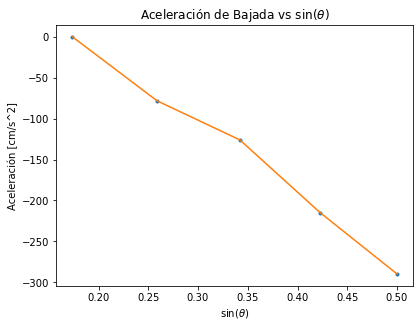

In [26]:
s = 0.8
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8*s,6*s))

sin_theta = np.sin(np.radians(acc_down_df["Degree"]))

axs.plot(sin_theta, acc_down_df["Polynomial"], ".")
axs.plot(sin_theta, acc_down_df["Polynomial"], "-")
    
axs.set_xlabel(r"sin($\theta$)") # sin(Angle)
axs.set_ylabel("Aceleración [cm/s^2]") # Acceleration
#axs.legend(["%s Grados" % i for i in names], fontsize=13*s) #degrees
axs.set_title(r"Aceleración de Bajada vs sin($\theta$)") # Down Acceleration vs sin(angle)
# axs.set_xlim(0.18, 0.68)
# axs.set_ylim(-750, -300)
plt.show()

### Fitting the dots

In [27]:
linspace_length = 300
#model_x = np.linspace(10, 30, linspace_length)
model_x = np.linspace(0.15, 0.55, linspace_length)

degree = 1

#coef_model = np.polyfit(acc_difs_df["Degree"], acc_difs_df["Abs_Difference"], degree)
coef_model = np.polyfit(sin_theta, acc_down_df["Polynomial"], degree)
pol_model = np.poly1d(coef_model)

print(pol_model)

 
-876.8 x + 155.8


In [28]:
angle = -coef_model[1]/coef_model[0]
mu = np.sin(angle)/np.cos(angle)
print(f"The friction coefficient of the experiment is {mu}")

#pol_theo = lambda x: 1000*(mu*np.cos(np.radians(x)) - np.sin(np.radians(x)))
pol_theo = lambda x: 1000*(mu*np.cos(np.arcsin(x)) -x)

The friction coefficient of the experiment is 0.17962493906615593


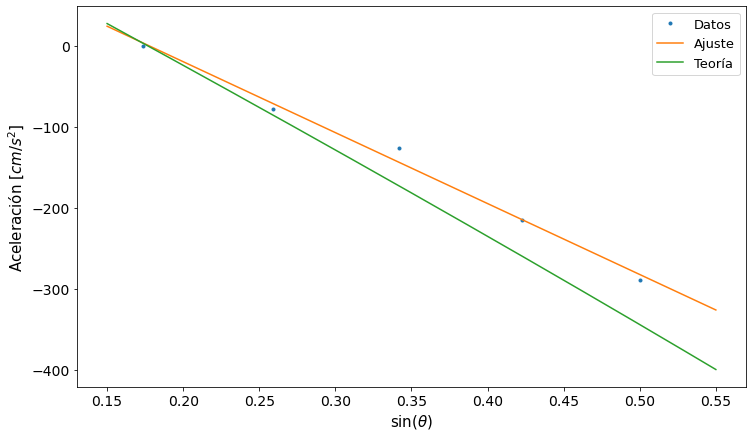

In [30]:
s = 1
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12*s,7*s))

#axs.plot(acc_difs_df["Degree"], acc_difs_df["Abs_Difference"], ".")
axs.plot(sin_theta, acc_down_df["Polynomial"], ".")
axs.plot(model_x, pol_model(model_x), "-")
axs.plot(model_x, pol_theo(model_x), "-")
    
axs.set_xlabel(r"sin($\theta$)", fontsize=15*s) # sin(angle)
axs.set_ylabel(f"Aceleración [$cm/s^2$]", fontsize=15*s) # Down Acceleration
axs.legend(["Datos", "Ajuste", "Teoría"], fontsize=13*s) # Data, Fit, Theory
axs.tick_params(axis='both', labelsize=14*s)
plt.show()